In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Regression and Objective Functions

Any potential trend line between two variables $X$ and $Y$ can be written as 

$$ Y = a+bX$$

here $b$ is called the slope, and $a$ is called the $Y$-intercept. Here $a$ is the value of $Y$ when $X = 0$, and $b$ controls how $Y$ changes as $X$ changes.

Is there some way we can we determine which of these trend line is "the best"? The answer turns out to be yes, as long as we decide what "the best" means.

Given a data set $\{(X_1,Y_1),...,(X_n,Y_n)\}$ consisting of observations of two variables, we want to find a function $f(x)$ so that $f(X_i)$ gives a prediction for $Y_i$. In this case we will look at linear functions $f(x)=a+b x$, and the process of finding a good choice for $a$ and $b$ is known as linear regression.

If $f(x)=a+b x$ is a candidate for our regression function, the $i$-th residual is 

$$\epsilon_i = Y_i - f(X_i) = Y_i-(a+b X_i).$$ 

The residual is a measure of error, measuring the difference between the actual value of $Y_i$ and the value $b X_i+a$ predicted by the model. 

<img src="Residuals.png" alt="Residuals" />

Generally speaking, better models have residuals with lower absolute value. However, you can almost always change $b$ and $a$ to lower some residuals at the cost of increasing others. To decide which regression line $f(x)=a+b x$ is best we must choose an objective function. In this case, it is a way of combining the residuals into a measure of the overall error.

One common way of choosing the model $Y=a+b X$, is known as Ordinary Least Squares Regression (OLS). In Ordinary Least Square Regression we pick the regression line that minimizes the residual sum of squares, RSS, that is we find $a$ and $b$ that minimizes

$$\textrm{RSS} = \sum_{i=1}^n \epsilon_i^2 = \sum_{i=1}^n (a+bX_i-Y_i)^2.$$

One big reason for using OLS, is the fact it is relatively easy to compute. In fact, explicit formulas can be given for $a$ and $b$. Namely, if $\overline{x}$ and $\overline{y}$ are the sample means 

$$\overline{x} = \frac{\sum_{i=1}^n x_i}{n} \text{ and } \overline{y} = \frac{\sum_{i=1}^n y_i}{n},$$
then 

$$ b = \frac{\sum_{i=1}^n \left(x_i-\overline{x}\right)\left(y_i-\overline{y}\right)}{\sum_{i=1}^n \left(x_i-\overline{x}\right)^2} \textrm{ and } a = \overline{y}-b \overline{x}.$$

These formulas can be hard to evaluate by hand for large data sets, but can be computed quickly by your computer. 

Another common choice for the objective function, is the Sum of Absolute Errors

$$\textrm{SAE} = \sum_{i=1}^n |a X_i+b-Y_i| = \sum_{i=1}^n |\epsilon_i|.$$

While the Sum of Absolute Errors itself might be easier to compute by hand, It turns out it is a bit harder to find the linear function $f(x)$ which minimizes the Sum of Absolute Errors. This is in part because, there maybe more than one line which minimizes the Sum. However, this approach does have some advantages. Regressions done with Sum of Absolute Errors tends to be more *robust*, behaving better if the data contains outliers or the residuals are non-normal. 

The reason for this are somewhat complicated but can be summarized as follows. For the regression line found with RSS as the objective function, $a+bX_i$ provides as estimate of the mean of $Y$ when $X=X_i$. However, for the regression line found with SAE as the objective function, $a+bX_i$ provides an estimate of the median of $Y$. The fact that SAE is less influenced by outliers is a consequence of the median being less influenced by outliers than the mean.

## Ordinary Least Squares Regression

Let's implement some code that can compute ordinary least squares regressions.

In [2]:
def ols(x,y):
    """ Compute slope of OLS for two np.arrays"""
    #initialize to to NaN, incase we can't compute slope.
    b,a = float("NaN"),float("NaN")
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b = sum((x-x_bar)*(y-y_bar))/sum((x-x_bar)**2)
    a = y_bar-b*x_bar
    return np.array([b,a])

# To confirm this works let's check by testing on a perfectly correlated data set
x = np.arange(0,10)
y = 3*x+0.5

ols(x,y)

array([3. , 0.5])

# Computing and Interpreting Least Square Regressions

Let's compute a least squares regression, for the housing data set, between floor_size and sold_price.

In [3]:
housing_df = pd.read_csv("../../data/Housing.csv")
housing_df.head()

floor_size  bed_room_count  built_year sold_date  sold_price  room_count  \
0        2068               3        2003   Aug2015      195500           6   
1        3372               3        1999   Dec2015      385000           6   
2        3130               3        1999   Jan2017      188000           7   
3        3991               3        1999   Nov2014      375000           8   
4        1450               2        1999   Jan2015      136000           7   

   garage_size  parking_lot  
0          768            3  
1          480            2  
2          400            2  
3          400            2  
4          200            1

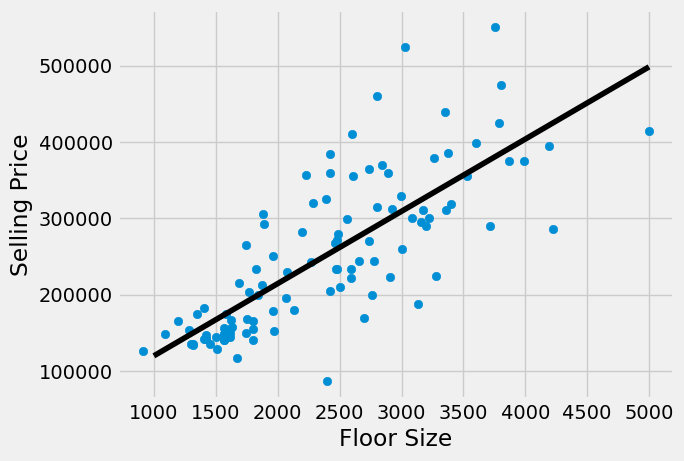

In [4]:
lin_regress   = ols(housing_df['floor_size'],housing_df['sold_price'])
def lin_reg_eval(t):
    "returns the output of the regression line"
    return t*lin_regress[0]+lin_regress[1]
plt.scatter(housing_df['floor_size'],housing_df['sold_price'])
plt.xlabel("Floor Size")
plt.ylabel("Selling Price")
plt.plot(np.arange(1000,5000), lin_reg_eval(np.arange(1000,5000)), "-",color="black");
plt.show()

One advantage that a linear regression has over more complicated approaches such as deep learning, in that the regression function is easily understood. For the floor size model above we can see get line $p(x)=94.66x + 25181.19$.

In [5]:
lin_regress

array([   94.6602687 , 25181.18878724])

# Interpretation of Regressions

In general, when performing a regression between variables $Y$ and $X$, we can think of the resulting regression function $f(x)$, as giving a prediction $f(X_i)$ of the mean value of $Y$ when $X=X_i$. For instance, using the linear regression above between floor size and sale price, we have $p(2500) = 261831$. 

In [6]:
# Compute the value of the linear regression when X=2500.
lin_reg_eval(2500)

261831.86053480077

This means the model predicts the average price of a $2500$ square foot apartment to be $\$261831$. While there are no examples in our DataFrame of apartments with exactly $2500$ square feet, there are several that are close. We see that the predicted price of $\$261831$ while perhaps being a slight overestimate is a reasonable guess at the price of a house of that size.

In [7]:
#Look at houses with square footage between 2450 and 2550
housing_df.loc[ abs(housing_df['floor_size']-2500) <= 50]

floor_size  bed_room_count  built_year sold_date  sold_price  room_count  \
14        2476               4        2006   Dec2014      233000           9   
43        2468               5        1995   May2015      233000           7   
51        2482               3        1997   Apr2017      271000           7   
78        2462               4        2008   Jul2017      267500          10   
81        2504               4        2005   Aug2016      210200           7   
84        2488               3        1995   Mar2015      279000           8   

    garage_size  parking_lot  
14          440            2  
43          484            2  
51          520            2  
78          200            1  
81          440            2  
84          638            2

Linear regressions have an advantage over other more complicated methods such as deep learning, in that the regression function is easily interpretable. For instance, with the regression function between floor_size and sell_price
$$ p(x)=94.66x + 25181.19.$$
The slope of this line has an interpretation, $\$94.66$ is the average increase in price of an apartment for every $1$ square foot increase in floor price. The intercept $25181.19$ is the prediction $p(0)$ of the sell_price of an apartment with $0$ square feet, since no such apartment can exist, the intercept is less immediately interpretable.

This example also illustrates a shortcoming of regressions. While they can be used to give predictions, if those values fall far outside the current data, the predictions likely will not be accurate.

## Evaluating Regression Model Performance 

Often after building a regression model $Y = b X + a$, we want a measure of how it performs. Namely, how much of the variation in $Y$ is explained by the variation in $X$. 

For instance, looking at the two graphs below, we can see than on the left our linear regression line explains most of the variation in $Y$, where as on the right $Y$ can be quite far from the regression line.

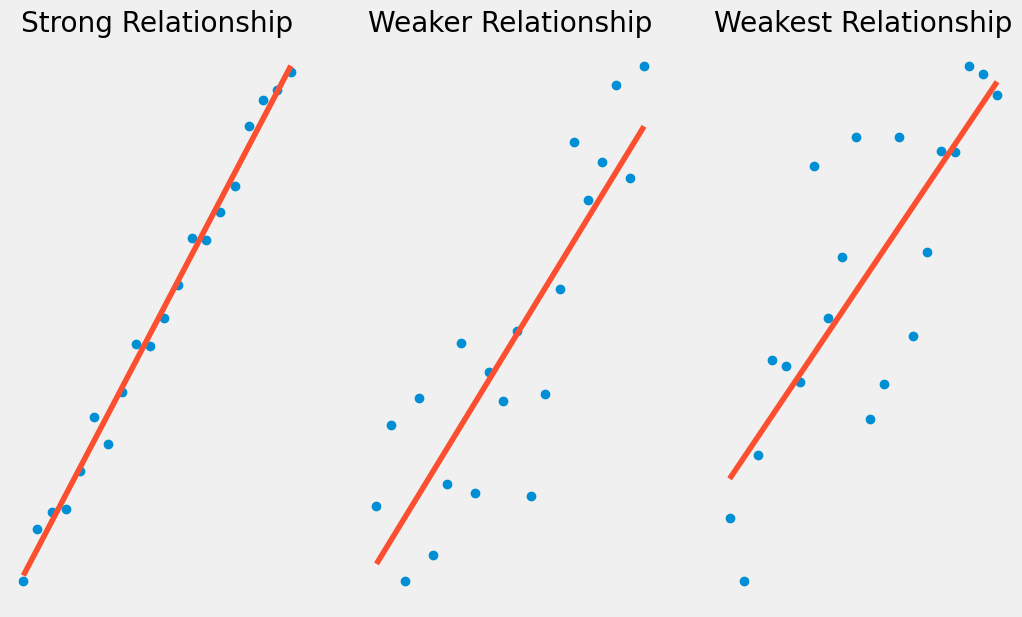

In [8]:
fig, axs = plt.subplots(1, 3);
fig.set_size_inches(11.5, 7)
np.random.seed(123)
x = np.arange(0, 20)
y = x-1+np.random.normal(0,0.5,20)
z = np.polyfit(x, y, 1) 
p = np.poly1d(z)
axs[ 0].plot(x, y, "o");
axs[0].plot(x, p(x), "-");
axs[0].set_title('Strong Relationship');
axs[0].axis('off');

x = np.arange(0, 20)
y = x-1+np.random.normal(0,3,20)
z = np.polyfit(x, y, 1) 
p = np.poly1d(z)
axs[1].plot(x, y, "o");
axs[1].plot(x, p(x), "-");
axs[1].set_title('Weaker Relationship');
axs[1].axis('off');

x = np.arange(0, 20)
y = x-1+np.random.normal(0,6,20)
z = np.polyfit(x, y, 1) 
p = np.poly1d(z)
axs[2].plot(x, y, "o");
axs[2].plot(x, p(x), "-");
axs[2].set_title('Weakest Relationship');
axs[2].axis('off');

Recall we have a measure already of the error which is not explained by our regression model. Namely, the Residual Sum of Squares
$$\sum_{i=1}^n (a+b X_i-Y_i)^2.$$

However, while this is useful for comparing data from the same data set, it's not a good measure of overall model performance. For instance, if I simply rescale $Y$, dividing every $Y_i$ value by $10$, I can after re-running my regression to get the new regression function $f(x) = a/10+b/10 X$. I would lower my $RSS$ by a factor of $100$. 

For this reason, it's useful to compare RSS to the overall variation in $Y$. That is the Total Sum of Squares (TSS), if $\bar{Y}$ is the sample mean of $Y$ then 

$$TSS = \sum_{i=1}^n (Y_i-\bar{Y})^2.$$

Using these we can define the Coefficient of Determinantion or $R^2$

$$R^2 = \frac{TSS - RSS}{TSS}.$$

We can think of $TSS-RSS$ as denote the total amount of variation in Y that is explained by our regression model. $R^2$ then becomes the proportion of variation in $Y$ that is explained by our regression model.

In [9]:
#Code to compute R-squared
def R_Squared(x,y):
    """ Given numpy arrays X and Y, compute R^2 for a OLS"""
    coeffs = ols(x,y)
    y_bar = np.mean(y)
    TSS = np.sum((y - y_bar)**2)
    RSS = np.sum((coeffs[0]*x+coeffs[1]-y)**2)
    return (TSS-RSS)/TSS

# Compute R^2 coefficient for our housing regression
R2 = R_Squared(housing_df['floor_size'],housing_df['sold_price'])
R2

0.6027784652096493

Our $R^2$ coefficient here is around $0.6$, meaning $60\%$ of the variation in sale price is explained by our regression model with floor size. 

You might recall we had another measure of the strength of a linear relationship between two variables, namely the correlation coefficient.

In [10]:
r = np.corrcoef(housing_df['floor_size'],housing_df['sold_price'])[0,1]
r

0.7763880893017673

It turns out for ordinary linear regressions that $R^2$, is the correlation coefficient squared. As the correlation coefficient is sometimes denoted $r$ this explains the name.

However, as we will see in later chapters, we can define $R^2$ for other regression models as well, and this will not hold in those cases.

In [11]:
print("corr^2 == ",round(r**2,5))
print("R^2 == ",round(R2,5))

corr^2 ==  0.60278
R^2 ==  0.60278


## Correlation and Standard Coordinates

In some contexts, it is standard practice to convert data to *standard coordinates* or $Z$-scores. That is convert our dataset so that the mean is 0 and standard deviation is 1. If $X = \{x_1,..,x_n\}$ is our dataset with sample mean $\overline{x}$ and sample standard deviation $S_X$ then in standard coordinates we have 

$$z_i = \dfrac{x_i - \overline{x}}{S_x}.$$ 

In [21]:
def standardize(X):
    """Convert the dataset to standard coordinates"""
    mx = np.mean(X)
    stdx = np.std(X,ddof=1)
    return (X-mx)/stdx
standardize(housing_df['floor_size'])

0     -0.366225
1      1.199441
2      0.908881
3      1.942653
4     -1.108236
         ...   
101   -0.952150
102   -0.899321
103    0.956907
104   -1.265523
105   -0.887314
Name: floor_size, Length: 106, dtype: float64

It should be noted data in standard coordinates doesn't usually have units associated with it, but it does have meaning. For instance a standard score of -1.5 for instance, means that the data points is one and a half standard deviations below the mean. 

Standard Coordinates are widely used in part, because for some techniques especially with multiple variables it is necessary that the values of all variables are close. For simple linear regression, this is not necessary. However, standard coordinates do allow us to connect the correlation coefficient with the regression line.

Namely, if $X$ and $Y$ have correlation coefficient $r$, then using standard coordinates 
$$\begin{aligned}
\tilde{X} &= \dfrac{X-\overline{X}}{S_X}\\
\tilde{Y} &= \dfrac{Y - \overline{Y}}{S_Y}\end{aligned}$$ 
the regression line for $\tilde{X}$ and $\tilde{Y}$ is given by 
$$\tilde{Y} = r \tilde{X}.$$

We verify this below with an example.

In [37]:
print(np.corrcoef(housing_df["floor_size"],housing_df["sold_price"])[0,1])

0.7763880893017673


In [38]:
# compute the ordinary least square regression line
z_floor_size = standardize(housing_df["floor_size"])
z_sold_price = standardize(housing_df["sold_price"])
ols(z_floor_size,z_sold_price)

array([7.76388089e-01, 1.74358139e-16])

As a consequence we obtain an alternative formula for the least square regression line.

$$\dfrac{Y - \overline{Y}}{S_Y} = r \dfrac{X-\overline{X}}{S_X}$$
solving this yields 
$$ Y = \dfrac{S_Y}{S_X}r X + \overline{Y}-\dfrac{S_Y}{S_X}r \overline{X}$$